<a href="https://colab.research.google.com/github/Kevin-2003/Lung-Cancer-Prediction/blob/main/lung_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


dataset = pd.read_csv("/content/drive/MyDrive/lung_cancer/survey_lung_cancer.csv")
dataset.head()


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,MALE,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES
1,MALE,74,1,0,0,0,1,1,1,0,0,0,1,1,1,YES
2,FEMALE,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO
3,MALE,63,1,1,1,0,0,0,0,0,1,0,0,1,1,NO
4,FEMALE,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO


In [ ]:
dataset["LUNG_CANCER"].value_counts()

LUNG_CANCER
YES    270
NO      39
Name: count, dtype: int64

In [ ]:
X = dataset.iloc[:,:15]
X.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,MALE,69,0,1,1,0,0,1,0,1,1,1,1,1,1
1,MALE,74,1,0,0,0,1,1,1,0,0,0,1,1,1
2,FEMALE,59,0,0,0,1,0,1,0,1,0,1,1,0,1
3,MALE,63,1,1,1,0,0,0,0,0,1,0,0,1,1
4,FEMALE,63,0,1,0,0,0,0,0,1,0,1,1,0,0


In [ ]:
Y=dataset.iloc[:,-1:]
Y.head()


,LUNG_CANCER
0,YES
1,YES
2,NO
3,NO
4,NO


In [ ]:
mapping = {'MALE' : 1, 'FEMALE' : 0}
X=X.replace({'GENDER' : mapping})

lungs = {"YES" : 1, "NO" : 0}
Y = Y.replace({'LUNG_CANCER' : lungs})

In [ ]:
Y

,LUNG_CANCER
0,1
1,1
2,0
3,0
4,0
...,...
304,1
305,1
306,1
307,1


In [ ]:
from sklearn.decomposition import PCA
sklearn_pca=PCA(n_components=2)
print(X.shape)
PCs=sklearn_pca.fit_transform(X)
print(PCs.shape)

(309, 15)
(309, 2)


<Axes: xlabel='PC1', ylabel='PC2'>

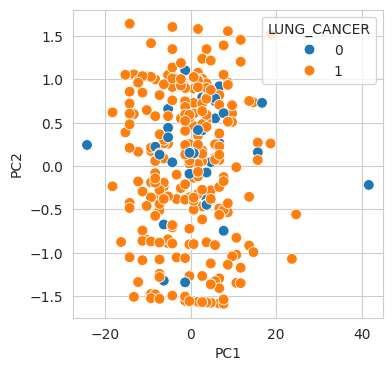

In [ ]:
dataset_transform=pd.DataFrame(PCs,columns=['PC1','PC2'])
dataset
dataset_transform=pd.concat([dataset_transform,Y],axis=1)
fig,axes=plt.subplots(figsize=(4,4))
sns.set_style("whitegrid")
sns.scatterplot(x='PC1',y='PC2',data=dataset_transform,hue='LUNG_CANCER',s=60)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)


In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred_dec = model.predict(X_test)
print(y_pred_dec)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_dec)
print(cm)
accuracy_score(y_test, y_pred_dec)

[[ 5  5]
 [ 1 51]]


0.9032258064516129

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")
classifier.fit(X_train, y_train)
y_pred_rf = classifier.predict(X_test)
print(y_pred_rf)

[1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


<ipython-input-105-c01f2737c376>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)
accuracy_score(y_test, y_pred_rf)

[[ 3  7]
 [ 1 51]]


0.8709677419354839

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg_class = LogisticRegression(max_iter=1000, random_state = 10)
log_reg_class.fit(X_train, y_train)
y_pred_log = log_reg_class.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_log)
print(cm)
accuracy_score(y_test, y_pred_log)

[[ 5  5]
 [ 1 51]]


0.9032258064516129

In [ ]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()

gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print(y_pred_gb)

[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_gb)
print(cm)
accuracy_score(y_test, y_pred_gb)

[[ 5  5]
 [ 3 49]]


0.8709677419354839

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import math
N = round(math.sqrt(X.shape[0]))
print(N)
knn_class = KNeighborsClassifier(n_neighbors = N, metric='manhattan')

knn_class.fit(X_train, y_train.to_numpy().ravel())
y_pred_knn = knn_class.predict(X_test)
print(y_pred_knn)

18
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_knn)
print(cm)
accuracy_score(y_test, y_pred_knn)

[[ 1  9]
 [ 0 52]]


0.8548387096774194

In [ ]:
import xgboost as xgb

In [ ]:
xgb_mod = xgb.XGBClassifier(n_estimators=1000, learning_rate=0.01, min_child_weight=4)
xgb_mod = xgb_mod.fit(X_train, y_train)
y_pred_xg = xgb_mod.predict(X_test)

print(y_pred_xg)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_knn)
print(cm)
accuracy_score(y_test, y_pred_xg)

[[ 1  9]
 [ 0 52]]


0.9032258064516129

In [ ]:
!pip install shap

In [ ]:
import shap
explainer = shap.TreeExplainer(xgb_mod)
shap_values = explainer.shap_values(X)
expected_value = explainer.expected_value

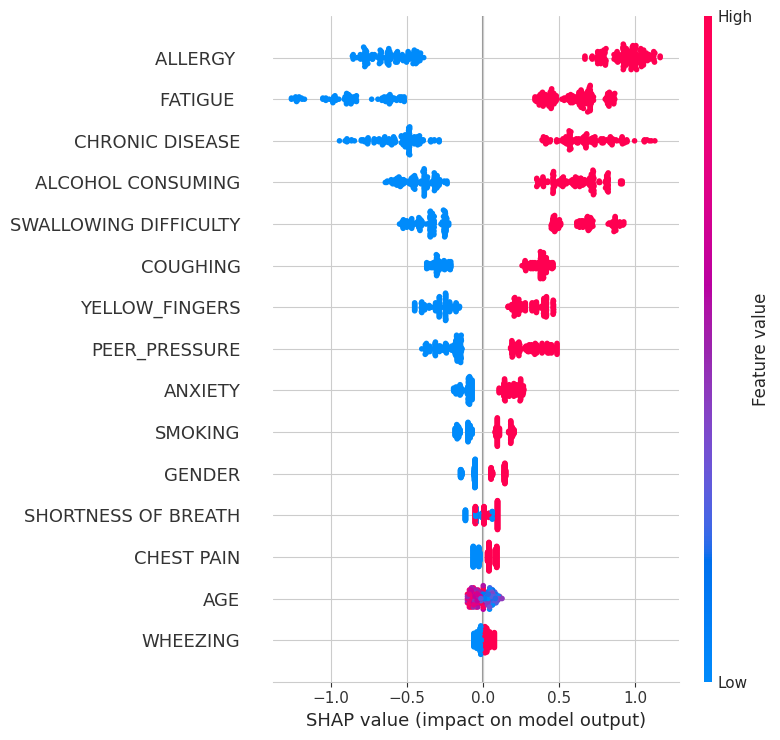

In [ ]:
shap.summary_plot(shap_values, X,title="SHAP summary plot")

In [ ]:
shap_values.shape

(309, 15)

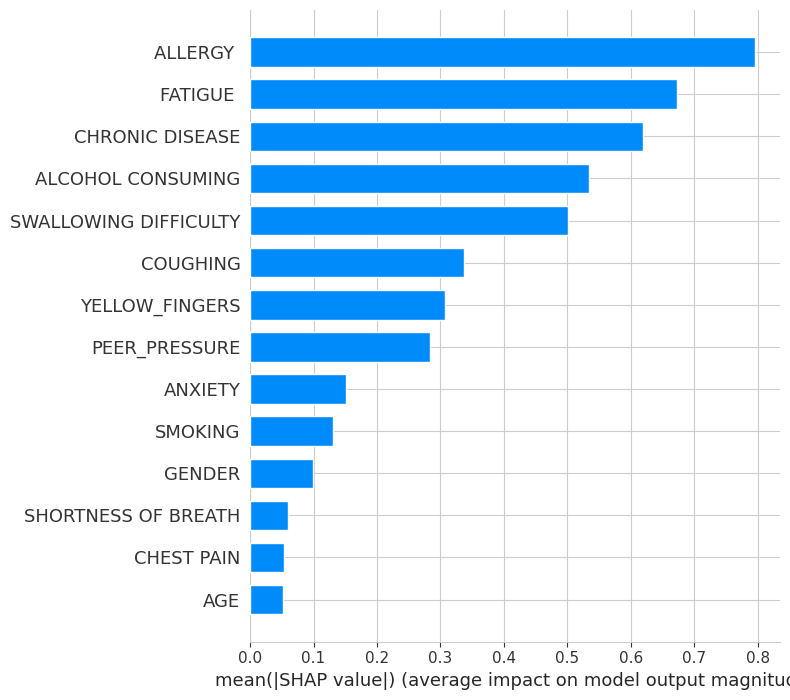

In [ ]:

shap.summary_plot(shap_values, X,plot_type="bar",max_display=14)
